<a href="https://colab.research.google.com/github/almirars/MachineLearning/blob/main/Kuis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- NIM  : 2241727003
- Nama : Almira Rahma Sabita
- Kelas :  TI 4J

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/dataset_quiz.csv')

data.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain;;;;;;;;;;;;;;;;;;;;;;;;;
0,7206,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
1,7214,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
2,5911,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
3,8402,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
4,8201,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;


In [ ]:
data.fillna(0)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain;;;;;;;;;;;;;;;;;;;;;;;;;
0,7206,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
1,7214,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
2,5911,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
3,8402,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
4,8201,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0.0,2019.0,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA;;;;;;;;;;;;;;;;;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,;;;;;;;;;;;;;;;;;;;;;;;;;,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
995,;;;;;;;;;;;;;;;;;;;;;;;;;,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
996,;;;;;;;;;;;;;;;;;;;;;;;;;,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
997,;;;;;;;;;;;;;;;;;;;;;;;;;,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
data.dtypes

id_ketua                                        object
id_anggota1                                    float64
id_anggota2                                    float64
id_anggota3                                    float64
id_anggota4                                    float64
id_anggota5                                    float64
keterlibatan_vltr                               object
jml_vltr_terlibat                              float64
tahun                                          float64
skema                                           object
luaran_hki                                      object
jenis_luaran_hki                                object
potensi_hki                                     object
luaran_lain                                     object
jenis_luaran_lain                               object
status_luaran_lain;;;;;;;;;;;;;;;;;;;;;;;;;     object
dtype: object

In [ ]:
data.pivot_table('jml_vltr_terlibat', ['skema'], aggfunc='sum').reset_index()

,skema,jml_vltr_terlibat
0,KEMITRAAN,7.0
1,REGULER,107.0


**NO 2 - VISUALISASI**

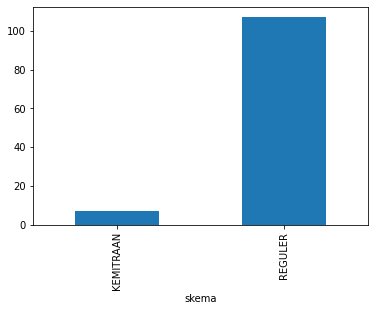

In [ ]:
data.groupby('skema').jml_vltr_terlibat.sum().plot.bar()

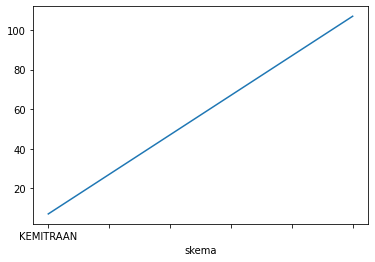

In [ ]:
data.groupby('skema').jml_vltr_terlibat.sum().plot.line()

**NO 3 - DATA TRAINING & DATA SET**

In [ ]:
y = data['keterlibatan_vltr'].map({'YA':1, 'TIDAK':0})
X1 = data['luaran_lain'].map({'TIDAK ADA':0, 'YA':1})
X2 = data['status_luaran_lain;;;;;;;;;;;;;;;;;;;;;;;;;'].map({'Draft':1, 'Terpublikasi':1, 'TIDAK ADA':0})

v1=[]
v2=[]
for x1 in X1:
  v1.append(x1)
for x2 in X2:
  v2.append(x2)

X = pd.DataFrame()

X['luaran_lain'] = v1
X['status_luaran_lain;;;;;;;;;;;;;;;;;;;;;;;;;'] = v2
print(X)

     luaran_lain  status_luaran_lain;;;;;;;;;;;;;;;;;;;;;;;;;
0            0.0                                          NaN
1            0.0                                          NaN
2            0.0                                          NaN
3            0.0                                          NaN
4            0.0                                          NaN
..           ...                                          ...
994          NaN                                          NaN
995          NaN                                          NaN
996          NaN                                          NaN
997          NaN                                          NaN
998          NaN                                          NaN

[999 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**NO 5 - PREDIKSI**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


StandardScaler()

In [ ]:
StandardScaler(copy=True, with_mean=True, with_std=True)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

In [ ]:
predictions = mlp.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

**NO 6 - CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

**NO 7 - RANDOM SEARCH**

In [ ]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

random = RandomizedSearchCV(dt, params, cv=cv)

%timeit random.fit(X, y)

score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')

**GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

grid = GridSearchCV(dt, param_grid=params, cv=cv)

%timeit grid.fit(X, y)

score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

**MLP CLASSIFIER**

AttributeError: ignored

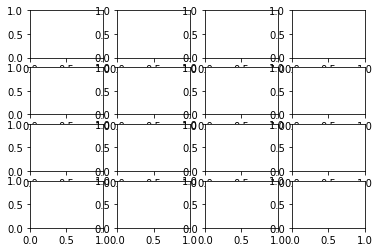

In [ ]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

plt.show()